<a href="https://colab.research.google.com/github/Mukiti-Ryan/IS_Project_Presentation/blob/main/Churn_Model_(Work_GB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IS Project 2 Datasets/churnmodel.csv')

df.shape

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(1000000, 16)

In [ ]:
df.head()

,Unnamed: 0,CD_ACCOUNT,STATUS2,DAYS_ACC_OPEN,CD_TYPE,VL_CREDIT_RECENCY,VL_DEBIT_RECENCY,VL_TENOR,AVGCREDITTURNOVER_LY,AVGDEBITTURNOVER_LY,AVGCREDIT_TRANS_LY,AVGDEBIT_TRANS_LY,AVGCREDITTURNOVER_LY2,AVGDEBITTURNOVER_LY2,AVGCREDIT_TRANS_LY2,AVGDEBIT_TRANS_LY2
0,0,1100000000000.0,NOT CHURNED,6173,1062,21.0,0.0,6170.0,438197.26,-474788.26,3.08,93.66,720779.28,-748023.72,6.33,133.41
1,1,1100000000000.0,CHURNED,6163,1062,313.0,0.0,6118.0,1666.66,-6590.41,0.16,1.25,1666.66,-9322.83,0.16,3.08
2,2,1100000000000.0,CHURNED,6152,1062,2126.0,1949.0,6132.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,3,1100000000000.0,CHURNED,6124,1062,982.0,0.0,5770.0,0.00,-1220.00,0.00,0.41,0.00,-2102.00,0.00,0.91
4,4,1100000000000.0,NOT CHURNED,6117,1062,0.0,0.0,6091.0,4126.41,-200.50,1.08,3.66,7935.41,-395.00,2.08,7.50


In [ ]:
print(df.dtypes)

Unnamed: 0                 int64
CD_ACCOUNT                object
STATUS2                   object
DAYS_ACC_OPEN              int64
CD_TYPE                    int64
VL_CREDIT_RECENCY        float64
VL_DEBIT_RECENCY         float64
VL_TENOR                 float64
AVGCREDITTURNOVER_LY     float64
AVGDEBITTURNOVER_LY      float64
AVGCREDIT_TRANS_LY       float64
AVGDEBIT_TRANS_LY        float64
AVGCREDITTURNOVER_LY2    float64
AVGDEBITTURNOVER_LY2     float64
AVGCREDIT_TRANS_LY2      float64
AVGDEBIT_TRANS_LY2       float64
dtype: object


In [ ]:
if 'Unnamed: 0' in df.columns:
  df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.describe()

,DAYS_ACC_OPEN,CD_TYPE,VL_CREDIT_RECENCY,VL_DEBIT_RECENCY,VL_TENOR,AVGCREDITTURNOVER_LY,AVGDEBITTURNOVER_LY,AVGCREDIT_TRANS_LY,AVGDEBIT_TRANS_LY,AVGCREDITTURNOVER_LY2,AVGDEBITTURNOVER_LY2,AVGCREDIT_TRANS_LY2,AVGDEBIT_TRANS_LY2
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,2284.078102,1062.066047,1253.543128,1979.869018,1990.893697,6.199422e+04,-6.279789e+04,2.469594,4.593288,2.075194e+05,-2.086299e+05,4.622181,8.833637
std,1737.424068,0.248364,4144.026051,5478.787665,2768.767119,8.613043e+06,8.593854e+06,49.061543,17.684722,9.422977e+07,9.423014e+07,90.504225,29.221068
min,20.000000,1062.000000,-300.000000,-81.000000,-19388.000000,-2.564250e+04,-6.375980e+09,-0.080000,0.000000,-2.564250e+04,-9.306696e+10,-0.080000,0.000000
25%,762.000000,1062.000000,0.000000,0.000000,684.000000,0.000000e+00,-1.022263e+04,0.000000,0.080000,2.080000e+00,-2.114132e+04,0.080000,0.250000
50%,1972.000000,1062.000000,26.000000,0.000000,1818.000000,2.416600e+02,-1.625000e+02,0.330000,0.580000,1.531630e+03,-1.333330e+03,0.580000,1.160000
75%,3461.000000,1062.000000,392.000000,378.000000,3391.000000,9.986130e+03,0.000000e+00,0.910000,3.910000,2.098290e+04,-3.100000e-01,1.660000,7.410000
max,44655.000000,1063.000000,19406.000000,19407.000000,44653.000000,6.375964e+09,1.563590e+03,25433.250000,12109.330000,9.306696e+10,1.563590e+03,47800.660000,15476.660000


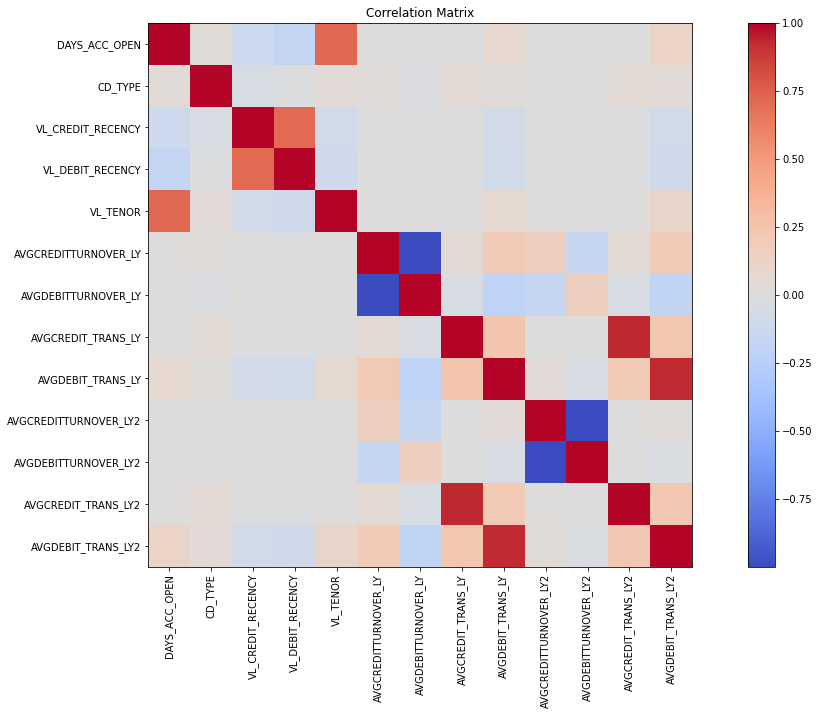

In [ ]:
corr = df.corr()

plt.figure(figsize = (20, 10))
plt.imshow(corr, cmap = 'coolwarm', interpolation = 'none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation = 90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='STATUS2', ylabel='count'>

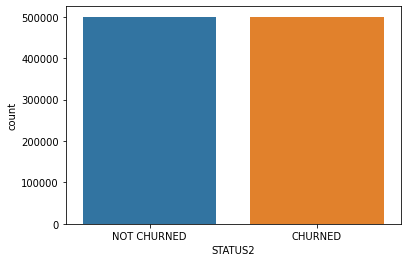

In [ ]:
sns.countplot(x = 'STATUS2', data = df)

In [ ]:
df['STATUS2'] = df['STATUS2'].map({'CHURNED': 1, 'NOT CHURNED': 0})
df['STATUS2'].value_counts()

0    500000
1    500000
Name: STATUS2, dtype: int64

In [ ]:
df.drop(['CD_ACCOUNT'], axis = 1, inplace = True)

In [ ]:
X = df.drop('STATUS2', axis = 1)
y = df['STATUS2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{cm}")

Confusion Matrix: 
[[100310      0]
 [     0  99690]]


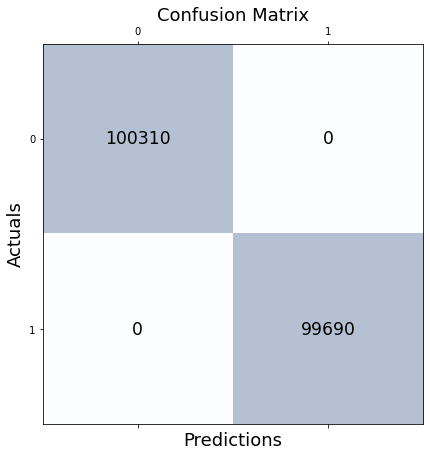

In [ ]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.matshow(cm, cmap = plt.cm.Blues, alpha = 0.3)
for i in range(cm.shape[0]):
  for j in range(cm.shape[1]):
    ax.text(x = j, y = i, s = cm[i, j], va = 'center', ha = 'center', size = 'xx-large')

plt.xlabel('Predictions', fontsize = 18)
plt.ylabel('Actuals', fontsize = 18)
plt.title('Confusion Matrix', fontsize = 18)
plt.show()

In [ ]:
cr = classification_report(y_test, y_pred)
print(f"Classification Report: \n{cr}")

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100310
           1       1.00      1.00      1.00     99690

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



In [ ]:
with open('gb_model.pkl', 'wb') as f:
  pickle.dump(gb_model, f)

In [ ]:
from google.colab import files
files.download('gb_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>